**Sentiment Analysis of IMDB Movie Reviews**

**Problem Statement:**

In this, we have to predict the number of positive and negative reviews based on sentiments by using different classification models.

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 6.0 MB/s 


In [ ]:
 #Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
save_path='/content/drive/MyDrive/'
#!ls /content/drive/MyDrive/
%cd /content/drive/MyDrive/Colab Notebooks/Wl_research_GUEFA_NGUIMNANG_VALDES/
"""
with open(save_path+'readme.txt','w') as f:
    f.write('bonjour toi!')
"""

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Wl_research_GUEFA_NGUIMNANG_VALDES


"\nwith open(save_path+'readme.txt','w') as f:\n    f.write('bonjour toi!')\n"

**Import necessary libraries**

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from PIL import ImageFont
import os
#print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')
import visualkeras
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)

from sklearn.model_selection import GridSearchCV
font = ImageFont.load_default()

**Import the training dataset**

In [ ]:
#importing the training data
imdb_data=pd.read_csv('IMDB_Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 4)


,Unnamed: 0,Unnamed: 0.1,review,sentiment
0,0,0,Once again Mr. Costner has dragged out a movie...,0
1,1,1,This is an example of why the majority of acti...,0
2,2,2,"First of all I hate those moronic rappers, who...",0
3,3,3,Not even the Beatles could write songs everyon...,0
4,4,4,Brass pictures (movies is not a fitting word f...,0
5,5,5,"A funny thing happened to me while watching ""M...",0
6,6,6,This German horror film has to be one of the w...,0
7,7,7,"Being a long-time fan of Japanese film, I expe...",0
8,8,8,"""Tokyo Eyes"" tells of a 17 year old Japanese g...",0
9,9,9,Wealthy horse ranchers in Buenos Aires have a ...,0


**Exploratery data analysis**

In [ ]:
#Summary of the dataset
imdb_data.describe()

,Unnamed: 0,Unnamed: 0.1,sentiment
count,50000.000000,50000.000000,50000.000000
mean,24999.500000,6249.500000,0.500000
std,14433.901067,3608.475256,0.500005
min,0.000000,0.000000,0.000000
25%,12499.750000,3124.750000,0.000000
50%,24999.500000,6249.500000,0.500000
75%,37499.250000,9374.250000,1.000000
max,49999.000000,12499.000000,1.000000


**Sentiment count**

In [ ]:
#sentiment count
imdb_data['sentiment'].value_counts()

0    25000
1    25000
Name: sentiment, dtype: int64

We can see that the dataset is balanced.

**Spliting the training dataset**

In [ ]:
#split the dataset  
#train dataset
xtrain, ytrain = train_test_split(imdb_data, test_size=0.3,random_state=25, shuffle=True)
train_reviews=xtrain['review']
train_sentiments=xtrain['sentiment']
#test dataset
test_reviews=ytrain['review']
test_sentiments=ytrain['sentiment']
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(35000,) (35000,)
(15000,) (15000,)


**Text normalization**

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
nltk.download("stopwords")
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Removing html strips and noise text**

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)
imdb_data.head()

,Unnamed: 0,Unnamed: 0.1,review,sentiment
0,0,0,Once again Mr. Costner has dragged out a movie...,0
1,1,1,This is an example of why the majority of acti...,0
2,2,2,"First of all I hate those moronic rappers, who...",0
3,3,3,Not even the Beatles could write songs everyon...,0
4,4,4,Brass pictures (movies is not a fitting word f...,0


**Removing special characters**

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)
x_clean = imdb_data['review']
y_clean = imdb_data['sentiment']

**Text stemming
**

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

**Removing stopwords**

In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'weren', 'with', 'his', 'because', 'just', 'you', "you've", 'doing', 'did', 'my', 'hadn', 'why', 'needn', 'most', "hadn't", 'are', 'o', 'is', 'any', 'over', 'your', 'can', 'from', "weren't", 'to', 'of', 'off', 'up', 'themselves', "doesn't", 'when', 'now', 'having', 'we', 'its', "haven't", "hasn't", 'out', "she's", 'in', 'some', 'i', 'both', 'have', 'wasn', 'if', "should've", 'shan', "aren't", "won't", 'during', "didn't", 'her', 'couldn', 'them', 'before', 'between', 'should', "isn't", 'too', 'than', "shan't", 'yourself', 'above', "you'd", 'and', 'below', 'our', 'hasn', 'so', 'isn', 'here', 'am', 'wouldn', 'be', 'whom', "you'll", 'they', 'against', 'yours', 'has', 'all', 'each', 'ours', 'herself', 'own', "it's", 'there', 'then', 'were', 'at', "you're", "needn't", 'she', "wouldn't", 'no', "don't", 've', 'where', 'doesn', 'the', 'by', 'mightn', 'how', 'as', "mustn't", 'himself', 'those', 's', "mightn't", 'for', 'such', 'm', 'again', 'hers', 'not', 'down', 'been', 'very', 'other', 'who', 

**Normalized train reviews**

In [ ]:
imdb_data.reindex()
xtrain,  xtest,ytrain, ytest = train_test_split(imdb_data['review'], imdb_data['sentiment'], test_size=0.3,random_state=25, shuffle=True)

In [ ]:
xtrain.head()

26254    watch 1936 version person annoy find charl boy...
29815    thi result piec trash movi doesnt deserv even ...
42848    possibl spoiler come youv forewarnedthi absolu...
26015    aint hilari averag schmo lead pathet life sudd...
38873    record affili product ani wayhidden frontier p...
Name: review, dtype: object

In [ ]:
#normalized train reviews
norm_train_reviews=xtrain
norm_train_reviews[26254]
#convert dataframe to string
#norm_train_string=norm_train_reviews.to_string()
#Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

'watch 1936 version person annoy find charl boyer voic match pay cosmopolitan depress rudolfi mean omar sharif tri notoo cute vibrant catherin denuev sp besid old look noth like marienoth look sophist even think die love thi man fashionth onli actor entir movi convey role theyr play ava gardner whose appear empress elisabeth screen fittingli brief look pictur empress pass resembl histor empress elisabeth wasnt involv much rudolf life'

**Normalized test reviews**

In [ ]:
#Normalized test reviews
norm_test_reviews=xtest
#norm_test_reviews[0]
##convert dataframe to string
#norm_test_string=norm_test_reviews.to_string()
#spelling correction using Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Tokenization using Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words

**Bags of words model **

It is used to convert text documents to numerical vectors or bag of words.

In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (35000, 5532429)
BOW_cv_test: (15000, 5532429)


**Term Frequency-Inverse Document Frequency model (TFIDF)**

It is used to convert text documents to  matrix of  tfidf features.

In [ ]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (35000, 5532429)
Tfidf_test: (15000, 5532429)


**Labeling the sentiment text**

In [ ]:
"""
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)
"""

"\n#labeling the sentient data\nlb=LabelBinarizer()\n#transformed sentiment data\nsentiment_data=lb.fit_transform(imdb_data['sentiment'])\nprint(sentiment_data.shape)\n"

In [ ]:
ytrain.head()

26254    0
29815    0
42848    1
26015    0
38873    1
Name: sentiment, dtype: int64

**Split the sentiment tdata**

In [ ]:
#Spliting the sentiment data
train_sentiments=ytrain
test_sentiments=ytest

#train_sentiments = train_sentiments.reshape(-1, 1)
#test_sentiments = test_sentiments.reshape(-1, 1)
print(train_sentiments)
print(test_sentiments)

26254    0
29815    0
42848    1
26015    0
38873    1
        ..
35702    0
26767    0
6618     0
24894    1
29828    0
Name: sentiment, Length: 35000, dtype: int64
13920    1
23439    1
11851    0
8278     0
31258    0
        ..
31994    0
4715     0
38700    1
49995    1
24859    1
Name: sentiment, Length: 15000, dtype: int64


**Modelling the dataset**

Let us build logistic regression model for both bag of words and tfidf features

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# Gridsearch to determine the value of C
param_grid = {'C':np.arange(0.01,10,5),
              'loss':['hinge','squared_hinge'],
              'penalty':['l1','l2']
              }
linearSVC = GridSearchCV(LinearSVC(),param_grid,cv=5,return_train_score=True)
linearSVC = linearSVC.fit(tv_train_reviews,train_sentiments)
print(linearSVC.best_params_)
#linearSVC.coef_
#linearSVC.intercept_




#training the model
linear_svc = LinearSVC(C=0.01,loss='hinge',penalty='l2', random_state=42)
#Fitting the model for Bag of words
linear_svc.fit(cv_train_reviews, train_sentiments)

#Fitting the model for tfidf features
linear_svc=linear_svc.fit(tv_train_reviews,train_sentiments)
print(linear_svc)

{'C': 0.01, 'loss': 'hinge', 'penalty': 'l2'}
LinearSVC(C=0.01, loss='hinge', random_state=42)


**Logistic regression model performane on test dataset**

In [ ]:
#Predicting the model for bag of words
ls_bow_predict=linear_svc.predict(cv_test_reviews)
print(ls_bow_predict)
##Predicting the model for tfidf features
ls_tfidf_predict=linear_svc.predict(tv_test_reviews)
print(ls_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


**Accuracy of the model**

In [ ]:
#Accuracy score for bag of words
ls_bow_score=accuracy_score(test_sentiments,ls_bow_predict)
print("lr_bow_score :",ls_bow_score)
#Accuracy score for tfidf features
ls_tfidf_score=accuracy_score(test_sentiments,ls_tfidf_predict)
print("lr_tfidf_score :",ls_tfidf_score)

lr_bow_score : 0.49693333333333334
lr_tfidf_score : 0.49693333333333334


**Print the classification report**

In [ ]:
#Classification report for bag of words 
ls_bow_report=classification_report(test_sentiments,ls_bow_predict)
print(ls_bow_report)

#Classification report for tfidf features
ls_tfidf_report=classification_report(test_sentiments,ls_tfidf_predict)
print(ls_tfidf_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7546
           1       0.50      1.00      0.66      7454

    accuracy                           0.50     15000
   macro avg       0.25      0.50      0.33     15000
weighted avg       0.25      0.50      0.33     15000

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7546
           1       0.50      1.00      0.66      7454

    accuracy                           0.50     15000
   macro avg       0.25      0.50      0.33     15000
weighted avg       0.25      0.50      0.33     15000



**Confusion matrix**

In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,ls_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,ls_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[7454    0]
 [7546    0]]
[[7454    0]
 [7546    0]]


**Stochastic gradient descent or Linear support vector machines for bag of words and tfidf features**

In [ ]:
"""
depthSize=[11,12,13,14,15,16,17,18,20,22,21,24,23,26,27,28,29,30]#[2,3,5,7,9,
f_train=[]
f_test=[]
print(train_sentiments.shape)
print(np.array(train_sentiments).reshape(-1, 1)[0])
train_sentiments = np.array(train_sentiments).reshape(-1, 1)
test_sentiments = np.array(test_sentiments).reshape(-1, 1)
for c in depthSize:
     Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=c),n_estimators=50)
     Adab.fit(tv_train_reviews, train_sentiments)
     val=np.array(Adab.predict(tv_train_reviews).reshape(-1, 1))
     print('val :'+str(val.shape))
     pred = np.array(Adab.predict(tv_test_reviews).reshape(-1, 1))
     print('pred:'+str(pred.shape))
     print('regularisation parameter C is :'+str(c))
     print('Accuracy of Adaboost classifier on training set: {:.2f}'.format(accuracy_score(np.array(val).reshape(-1,1), np.array(train_sentiments).reshape(-1,1))))
     print('Accuracy of Adaboost classifier on test set: {:.2f}'
          .format(accuracy_score(pred, test_sentiments)))
    
     f_train.append(accuracy_score(val, train_sentiments))
     f_test.append(accuracy_score(pred, test_sentiments))
     
     #plot_confusion_matrix(cm3, classes=['FAKE', 'REAL'])
    
#plt.plot(cs)
plt.plot(depthSize,f_train)
#plt.show()

#plt.plot(cs)
plt.plot(depthSize, f_test)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('params C')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
"""

"\ndepthSize=[11,12,13,14,15,16,17,18,20,22,21,24,23,26,27,28,29,30]#[2,3,5,7,9,\nf_train=[]\nf_test=[]\nprint(train_sentiments.shape)\nprint(np.array(train_sentiments).reshape(-1, 1)[0])\ntrain_sentiments = np.array(train_sentiments).reshape(-1, 1)\ntest_sentiments = np.array(test_sentiments).reshape(-1, 1)\nfor c in depthSize:\n     Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=c),n_estimators=50)\n     Adab.fit(tv_train_reviews, train_sentiments)\n     val=np.array(Adab.predict(tv_train_reviews).reshape(-1, 1))\n     print('val :'+str(val.shape))\n     pred = np.array(Adab.predict(tv_test_reviews).reshape(-1, 1))\n     print('pred:'+str(pred.shape))\n     print('regularisation parameter C is :'+str(c))\n     print('Accuracy of Adaboost classifier on training set: {:.2f}'.format(accuracy_score(np.array(val).reshape(-1,1), np.array(train_sentiments).reshape(-1,1))))\n     print('Accuracy of Adaboost classifier on test set: {:.2f}'\n          .format(accuracy_score(pred, te

In [ ]:
"""

#training the AdaBoostClassifier
AdaBoostClassifier=AdaBoostClassifier(DecisionTreeClassifier(max_depth=15),n_estimators=50)
#fitting the AdaBoostClassifier for bag of words
AdaBoostClassifier_bow=AdaBoostClassifier.fit(cv_train_reviews,train_sentiments)
print(AdaBoostClassifier_bow)
#fitting the svm for tfidf features
AdaBoostClassifier_tfidf=AdaBoostClassifier.fit(tv_train_reviews,train_sentiments)
print(AdaBoostClassifier_tfidf)
"""

'\n\n#training the AdaBoostClassifier\nAdaBoostClassifier=AdaBoostClassifier(DecisionTreeClassifier(max_depth=15),n_estimators=50)\n#fitting the AdaBoostClassifier for bag of words\nAdaBoostClassifier_bow=AdaBoostClassifier.fit(cv_train_reviews,train_sentiments)\nprint(AdaBoostClassifier_bow)\n#fitting the svm for tfidf features\nAdaBoostClassifier_tfidf=AdaBoostClassifier.fit(tv_train_reviews,train_sentiments)\nprint(AdaBoostClassifier_tfidf)\n'

**Model performance on test data**

In [ ]:
"""
#Predicting the model for bag of words
AdaBoostClassifier_bow_predict=AdaBoostClassifier.predict(cv_test_reviews)
print(AdaBoostClassifier_bow_predict)
#Predicting the model for tfidf features
AdaBoostClassifier_tfidf_predict=AdaBoostClassifier.predict(tv_test_reviews)
print(AdaBoostClassifier_tfidf_predict)
"""

'\n#Predicting the model for bag of words\nAdaBoostClassifier_bow_predict=AdaBoostClassifier.predict(cv_test_reviews)\nprint(AdaBoostClassifier_bow_predict)\n#Predicting the model for tfidf features\nAdaBoostClassifier_tfidf_predict=AdaBoostClassifier.predict(tv_test_reviews)\nprint(AdaBoostClassifier_tfidf_predict)\n'

**Accuracy of the model**

In [ ]:
"""
#Accuracy score for bag of words
AdaBoostClassifier_bow_score=accuracy_score(test_sentiments,AdaBoostClassifier_bow_predict)
print("AdaBoostClassifier_bow_score :",AdaBoostClassifier_bow_score)
#Accuracy score for tfidf features
AdaBoostClassifier_tfidf_score=accuracy_score(test_sentiments,AdaBoostClassifier_tfidf_predict)
print("AdaBoostClassifier_tfidf_score :",AdaBoostClassifier_tfidf_score)
"""

'\n#Accuracy score for bag of words\nAdaBoostClassifier_bow_score=accuracy_score(test_sentiments,AdaBoostClassifier_bow_predict)\nprint("AdaBoostClassifier_bow_score :",AdaBoostClassifier_bow_score)\n#Accuracy score for tfidf features\nAdaBoostClassifier_tfidf_score=accuracy_score(test_sentiments,AdaBoostClassifier_tfidf_predict)\nprint("AdaBoostClassifier_tfidf_score :",AdaBoostClassifier_tfidf_score)\n'

**Print the classification report**

In [ ]:
"""
#Classification report for bag of words 
AdaBoostClassifier_bow_report=classification_report(test_sentiments,AdaBoostClassifier_bow_predict)
print(AdaBoostClassifier_bow_report)
#Classification report for tfidf features
AdaBoostClassifier_tfidf_report=classification_report(test_sentiments,AdaBoostClassifier_tfidf_predict)
print(AdaBoostClassifier_tfidf_report)
"""

'\n#Classification report for bag of words \nAdaBoostClassifier_bow_report=classification_report(test_sentiments,AdaBoostClassifier_bow_predict)\nprint(AdaBoostClassifier_bow_report)\n#Classification report for tfidf features\nAdaBoostClassifier_tfidf_report=classification_report(test_sentiments,AdaBoostClassifier_tfidf_predict)\nprint(AdaBoostClassifier_tfidf_report)\n'

**Plot the confusion matrix**

In [ ]:
"""
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,AdaBoostClassifier_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,AdaBoostClassifier_tfidf_predict,labels=[1,0])
print(cm_tfidf)
"""

'\n#confusion matrix for bag of words\ncm_bow=confusion_matrix(test_sentiments,AdaBoostClassifier_bow_predict,labels=[1,0])\nprint(cm_bow)\n#confusion matrix for tfidf features\ncm_tfidf=confusion_matrix(test_sentiments,AdaBoostClassifier_tfidf_predict,labels=[1,0])\nprint(cm_tfidf)\n'

**Multinomial Naive Bayes for bag of words and tfidf features**

In [ ]:
"""
from sklearn.naive_bayes import MultinomialNB
cs=[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,12,14,16,18,20,22,24,26,28,29,30]#,100,300,1000,3000,10000,30000,100000,300000,1000000,3000000]
f_train=[]
f_test=[]

for c in cs:
     bayes = MultinomialNB(alpha=c)
     bayes.fit(tv_train_reviews, train_sentiments)
     pred = bayes.predict(tv_test_reviews).reshape(-1, 1)
     val=bayes.predict(tv_train_reviews).reshape(-1, 1)
     print('regularisation parameter C is :'+str(c))
     print('Accuracy of NB  classifier on training set: {:.2f}'
          .format(accuracy_score(val, train_sentiments)))
     print('Accuracy of NB classifier on test set: {:.2f}'
          .format(accuracy_score(pred, test_sentiments)))
   
     f_train.append(accuracy_score(val, train_sentiments))
     f_test.append(accuracy_score(pred, test_sentiments))
     print(classification_report(test_sentiments, pred))
     #confusion_matrix(y_test, pred)
     cm2 = confusion_matrix(test_sentiments, pred)
     print(cm2)
    
     print('\n')
    
#plt.plot(cs)
plt.plot(cs,f_train)
#plt.show()

#plt.plot(cs)
plt.plot(cs,f_test)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('params C')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
##a supprime
"""

"\nfrom sklearn.naive_bayes import MultinomialNB\ncs=[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,12,14,16,18,20,22,24,26,28,29,30]#,100,300,1000,3000,10000,30000,100000,300000,1000000,3000000]\nf_train=[]\nf_test=[]\n\nfor c in cs:\n     bayes = MultinomialNB(alpha=c)\n     bayes.fit(tv_train_reviews, train_sentiments)\n     pred = bayes.predict(tv_test_reviews).reshape(-1, 1)\n     val=bayes.predict(tv_train_reviews).reshape(-1, 1)\n     print('regularisation parameter C is :'+str(c))\n     print('Accuracy of NB  classifier on training set: {:.2f}'\n          .format(accuracy_score(val, train_sentiments)))\n     print('Accuracy of NB classifier on test set: {:.2f}'\n          .format(accuracy_score(pred, test_sentiments)))\n   \n     f_train.append(accuracy_score(val, train_sentiments))\n     f_test.append(accuracy_score(pred, test_sentiments))\n     print(classification_report(test_sentiments, pred))\n     #confusion_matrix(y_test, pred)\n     cm2 = confusion_matrix(test_sentiments, pred)\

In [ ]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


**Model performance on test data**

In [ ]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[1 1 0 ... 0 1 0]
[1 1 0 ... 0 1 0]


**Accuracy of the model**

In [ ]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7421333333333333
mnb_tfidf_score : 0.7421333333333333


**Print the classification report**

In [ ]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict)
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict)
print(mnb_tfidf_report)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      7546
           1       0.74      0.74      0.74      7454

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      7546
           1       0.73      0.75      0.74      7454

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000



**Plot the confusion matrix**

In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[5529 1925]
 [1943 5603]]
[[5622 1832]
 [2036 5510]]


**Let us see positive and negative words by using WordCloud.**

**Word cloud for positive review words**

In [ ]:
"""
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show
"""

"\n#word cloud for positive review words\nplt.figure(figsize=(10,10))\npositive_text=norm_train_reviews[1]\nWC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)\npositive_words=WC.generate(positive_text)\nplt.imshow(positive_words,interpolation='bilinear')\nplt.show\n"

**Word cloud for negative review words**

In [ ]:
"""
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show
"""

"\n#Word cloud for negative review words\nplt.figure(figsize=(10,10))\nnegative_text=norm_train_reviews[8]\nWC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)\nnegative_words=WC.generate(negative_text)\nplt.imshow(negative_words,interpolation='bilinear')\nplt.show\n"

**Conclusion:**
* We can observed that both logistic regression and multinomial naive bayes model performing well compared to linear support vector  machines.
* Still we can improve the accuracy of the models by preprocessing data and by using lexicon models like Textblob.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 16.8 MB/s 
     |████████████████████████████████| 6.6 MB 49.1 MB/s 
     |████████████████████████████████| 596 kB 60.4 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input,GlobalMaxPool1D,Dropout,GaussianNoise
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Input,GlobalMaxPool1D,Dropout,concatenate
from tensorflow.keras.models import Model
#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras
from PIL import ImageFont


import tensorflow as tf
import nltk
import keras
import re
from nltk.corpus import stopwords #corpus is collection of text
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from keras.callbacks import LearningRateScheduler
from keras import backend as K

vo_size=1000
#X_train = train['total']
#Y_train = train['label']
#weight={0:0.01, 1:600}

In [ ]:
lr_sched = LearningRateScheduler(lambda epoch: 1e-4 * (0.75 ** np.floor(epoch / 2)))

In [ ]:
onehot_rep_text = [one_hot(words, vo_size) for words in imdb_data['review']]
embedded_doc_text=pad_sequences(onehot_rep_text, padding='pre', maxlen=700)
X_final_text=np.array(embedded_doc_text)
y_final=np.array(imdb_data['sentiment'])
optimizer = tf.keras.optimizers.Adam(lr=0.005)
callback=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>=79):
            print('\n accuracy is about 79 so cancelling training!')
            self.model.stop_training = True
callback1=myCallback()

In [ ]:
# model 1 build 
embedding_vector_feature = 300
model=Sequential()
model.add(Embedding(vo_size,embedding_vector_feature,input_length=700))
model.add(LSTM(300))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 700, 300)          300000    
                                                                 
 lstm_1 (LSTM)               (None, 300)               721200    
                                                                 
 dense_1 (Dense)             (None, 1)                 301       
                                                                 
Total params: 1,021,501
Trainable params: 1,021,501
Non-trainable params: 0
_________________________________________________________________
None


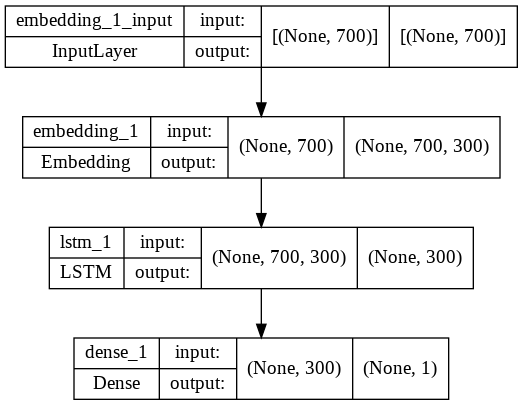

In [ ]:
plot_model(model, to_file='model1.png', show_shapes=True, show_layer_names=True)

In [ ]:
# train
historyA = model.fit(x=[X_final_text], y=y_final, batch_size=32, epochs=10, verbose=1, validation_split=0.3, callbacks=[callback, callback1])
#model.save_weights("model_multi1.h5")
#print(history.history)
print('end of fit :)')

model_json = model.to_json()
with open(save_path+"model_asupA1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(save_path+"model_asupA1.h5")

Epoch 1/10
137/137 [==============================] - 2721s 20s/step - loss: 0.5178 - accuracy: 0.7398 - val_loss: 0.6713 - val_accuracy: 0.6258
Epoch 2/10
137/137 [==============================] - 2751s 20s/step - loss: 0.3864 - accuracy: 0.8246 - val_loss: 0.4842 - val_accuracy: 0.7695
Epoch 3/10
137/137 [==============================] - 2758s 20s/step - loss: 0.3572 - accuracy: 0.8416 - val_loss: 0.7549 - val_accuracy: 0.6769
Epoch 4/10
137/137 [==============================] - 2732s 20s/step - loss: 0.3413 - accuracy: 0.8486 - val_loss: 0.5019 - val_accuracy: 0.7679
Epoch 5/10
137/137 [==============================] - 2729s 20s/step - loss: 0.3299 - accuracy: 0.8555 - val_loss: 0.5100 - val_accuracy: 0.7678
end of fit :)


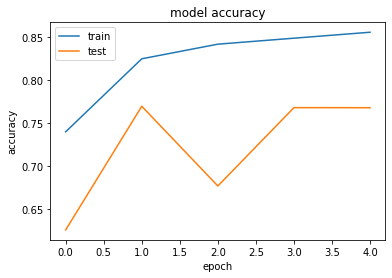

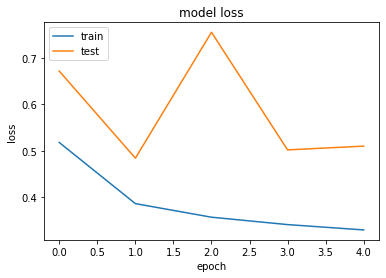

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(historyA.history['accuracy'])
plt.plot(historyA.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Accuracy plot1.jpg")

# summarize history for loss
plt.plot(historyA.history['loss'])
plt.plot(historyA.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Loss plt1.jpg")


In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.0002)

embedding_vector_feature_text = 200

input_text=Input(shape=(700,))
emb_text = Embedding(vo_size,embedding_vector_feature_text)(input_text)
lstm_text = LSTM(128, return_sequences=True)(emb_text)
max_pool_text = GlobalMaxPool1D()(lstm_text)
dropout_1_text = Dropout(0.1)(max_pool_text)
dense_1_text = Dense(50, activation='relu')(dropout_1_text)
dropout_2_text = Dropout(0.1)(dense_1_text)

#out = concatenate([lstm_title,dropout_2_text],axis=-1)
output=Dense(1, activation='sigmoid')(dropout_2_text)

model = Model(inputs=[input_text], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 700)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 700, 200)          200000    
                                                                 
 lstm_3 (LSTM)               (None, 700, 128)          168448    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                6450      
                                                           

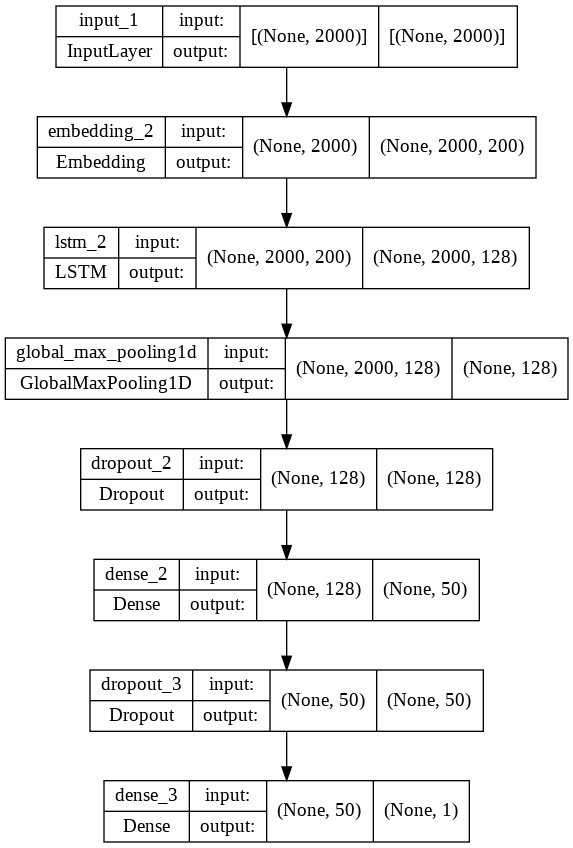

In [ ]:
plot_model(model, to_file='model2.png', show_shapes=True, show_layer_names=True)

In [ ]:
# train
historyB = model.fit(x=[X_final_text], y=y_final, batch_size=32, epochs=9, verbose=1, validation_split=0.3, callbacks=[callback,callback1])

#model.save_weights("model_multi.h5")
# Save model
# serialize model to JSON
model_json = model.to_json()
with open(save_path+"model_asupB1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(save_path+"model_asupB1.h5")

Epoch 1/9
625/625 [==============================] - 1075s 2s/step - loss: 0.4553 - accuracy: 0.7809 - val_loss: 0.6648 - val_accuracy: 0.6553
Epoch 2/9
625/625 [==============================] - 1072s 2s/step - loss: 0.3867 - accuracy: 0.8264 - val_loss: 0.5735 - val_accuracy: 0.7032
Epoch 3/9
625/625 [==============================] - 1071s 2s/step - loss: 0.3533 - accuracy: 0.8425 - val_loss: 0.6668 - val_accuracy: 0.6699
Epoch 4/9
625/625 [==============================] - 1071s 2s/step - loss: 0.3252 - accuracy: 0.8584 - val_loss: 0.5090 - val_accuracy: 0.7702
Epoch 5/9
625/625 [==============================] - 1069s 2s/step - loss: 0.2951 - accuracy: 0.8745 - val_loss: 0.4493 - val_accuracy: 0.7971
Epoch 6/9
625/625 [==============================] - 1084s 2s/step - loss: 0.2691 - accuracy: 0.8873 - val_loss: 0.5372 - val_accuracy: 0.7521
Epoch 7/9
625/625 [==============================] - 1070s 2s/step - loss: 0.2386 - accuracy: 0.9015 - val_loss: 0.5580 - val_accuracy: 0.7687

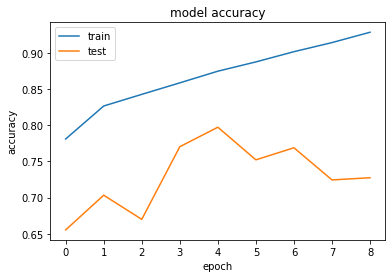

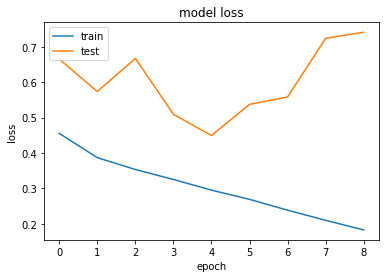

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(historyB.history['accuracy'])
plt.plot(historyB.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Accuracy plot2.jpg")

# summarize history for loss
plt.plot(historyB.history['loss'])
plt.plot(historyB.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Loss plt2.jpg")

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(imdb_data['review'])
encoded_docs = tokenizer.texts_to_sequences(imdb_data['review'])
padded_sequence = pad_sequences(encoded_docs, maxlen=700)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.callbacks import LearningRateScheduler
#lr_sched = LearningRateScheduler(lambda epoch: 1e-4 * (0.75 ** np.floor(epoch / 2)))
#optimizer = tf.keras.optimizers.Adam(lr=0.01)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=88):
      print('Accuracy is about 88% so cancelling training!')
      self.model.stop_training = True
lr_sched = myCallback()
embedding_vector_length = 200
model = Sequential()
vocab_size = len(tokenizer.word_index) + 1
model.add(Embedding(vocab_size, embedding_vector_length, input_length=700))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 700, 200)          36311200  
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 700, 200)         0         
 lDropout1D)                                                     
                                                                 
 lstm_5 (LSTM)               (None, 50)                50200     
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 36,361,451
Trainable params: 36,361,451
Non-trainable params: 0
__________________________________________

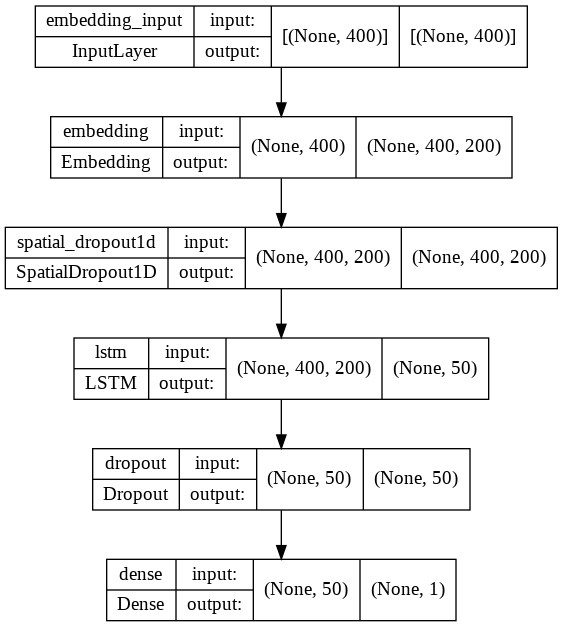

In [ ]:
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(padded_sequence,imdb_data['sentiment'],validation_split=0.3, epochs=7, batch_size=32, callbacks=[callback,lr_sched])

Epoch 1/7
1094/1094 [==============================] - 1655s 2s/step - loss: 0.3509 - accuracy: 0.8456 - val_loss: 0.5222 - val_accuracy: 0.8111
Epoch 2/7
  17/1094 [..............................] - ETA: 25:41 - loss: 0.2187 - accuracy: 0.9099

KeyboardInterrupt: ignored

In [ ]:
#model.save_weights("model_multi.h5")
# Save model
# serialize model to JSON
model_json = model.to_json()
with open(save_path+"model_asupC2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(save_path+"model_asupC2.h5")

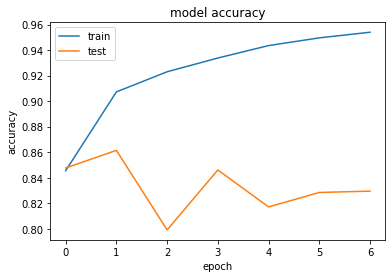

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Accuracy plot1.jpg")
plt.savefig("Accuracy plot3.jpg")

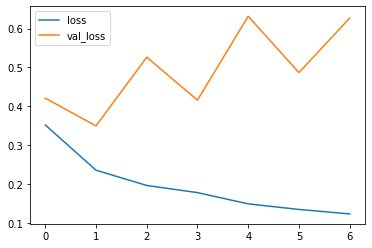

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt3.jpg")

## Bert Fine-tuning
https://www.kaggle.com/code/valdesguefa/sentimentanalysisbertfinal